In [1]:
import torch
import torchode as to
import matplotlib.pyplot as plt

In [2]:
values = [1,0.0179,0.6,0.610936,0.0174319,0.00659973,
2,0.0073,0.6,0.626729,0.00715554,0.00280958,
3,0.0154,0.6,0.641558,0.0150136,0.00598728,
4,0.0102,0.6,0.658861,0.00997627,0.0041075,
5,0.0048,0.6,0.669326,0.00471155,0.00198099,
6,0.0125,0.6,0.681751,0.0122033,0.00518898,
7,0.0382,0.6,0.720427,0.0365676,0.0160499,
8,0.0118,0.6,0.761273,0.0115145,0.00547605,
9,0.02,0.6,0.78936,0.01938,0.00949442,
10,0.0761,0.6,0.885895,0.0698118,0.0367623,
11,0.0105,0.6,0.984849,0.0102317,0.00631726,
12,0.0024,0.6,1.00129,0.00235772,0.00148751,
13,0.0054,0.6,1.01146,0.00528835,0.00336453,
14,0.0128,0.6,1.03585,0.0124355,0.00806938,
15,0.0038,0.6,1.05875,0.0037269,0.00248477,
16,0.0058,0.6,1.07239,0.00567568,0.00382896,
17,0.0288,0.6,1.1242,0.0274294,0.0191865,
18,0.0124,0.6,1.19,0.0120284,0.00898637,
19,0.0047,0.6,1.2191,0.00460156,0.00353355,
20,0.0015,0.6,1.22993,0.00147441,0.00114365,
21,0.1693,0.6,1.6275,0.120076,0.124569,
22,0.0022,0.6,2.15793,0.00215608,0.00293962,
23,0.0059,0.6,2.19153,0.00573395,0.00795842,
24,0.0107,0.6,2.26291,0.0102781,0.014787,
25,0.0606,0.6,2.62226,0.0500482,0.0891161,
26,0.0067,0.6,3.02126,0.00646244,0.012443,
27,0.002,0.6,3.08096,0.00195725,0.00381669,
28,0.001,0.6,3.102,0.00098168,0.00192448,
29,0.0319,0.6,3.3525,0.0280031,0.063044,
30,0.0246,0.6,3.84732,0.0218975,0.0564836,
31,0.0042,0.6,4.13998,0.00406307,0.0107318]

In [26]:
values = torch.Tensor(values).reshape(31,6)
split_values = torch.hsplit(values,6)

c=torch.squeeze(split_values[3])
m=0.6

{'n_f_evals': tensor([224]), 'n_steps': tensor([37]), 'n_accepted': tensor([34]), 'n_initialized': tensor([10000])}


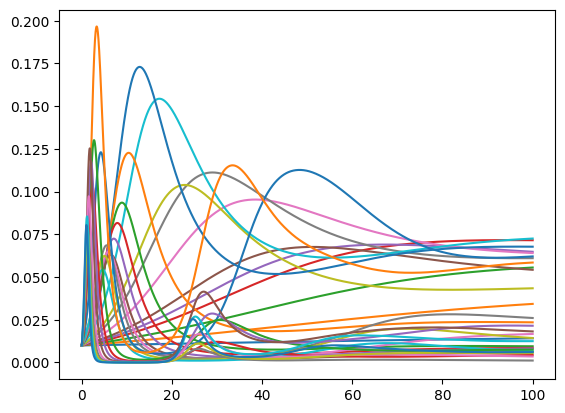

In [28]:
def dpdt_paper(t,p,args):
    c = args[0]
    m = args[1]
    sum_previous = torch.cumsum(torch.squeeze(p),dim=0)
    sum_previous = torch.cat((torch.tensor([0]),sum_previous[0:-1]))

    dpdt = c*p*(1-p-p*sum_previous)-(m*p)-sum_previous*(c*sum_previous*p)

    return(dpdt)

p0 = 0.01 * torch.ones(31)
p0 = p0[None,:]
n_steps = 10000
t_eval = torch.linspace(0, 100, n_steps)
t_eval = t_eval[None,:]

term = to.ODETerm(dpdt_paper,with_args=True)
step_method = to.Dopri5(term=term)
step_size_controller = to.IntegralController(atol=1e-6, rtol=1e-3, term=term)
solver = to.AutoDiffAdjoint(step_method, step_size_controller)
#jit_solver = torch.compile(solver)

sol = solver.solve(to.InitialValueProblem(t_eval=t_eval,y0=p0),args=(c,m))
print(sol.stats)
# => {'n_f_evals': tensor([26, 26]), 'n_steps': tensor([4, 2]),
# =>  'n_accepted': tensor([4, 2]), 'n_initialized': tensor([10, 10])}

plt.plot(sol.ts[0], sol.ys[0]) ;

In [31]:
print(torch.sum(sol.ys[0][-1]))

tensor(0.9239)
